In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

In [6]:
train_data=pd.read_csv('/content/sample_data/train.csv.zip')
test_data=pd.read_csv('/content/sample_data/test.csv.zip')
train_data.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [7]:
print("First 5 rows of train_data:")
print(train_data.head())

print("\nConcise summary of train_data:")
train_data.info()

print("\nShape of train_data (rows, columns):")
print(train_data.shape)

First 5 rows of train_data:
   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156       

**Reasoning**:
Now that the basic overview of the `train_data` DataFrame is complete, the next logical step in EDA is to calculate descriptive statistics for its numerical features to understand their central tendency, dispersion, and shape.



In [8]:
print("Descriptive statistics for numerical features of train_data:")
print(train_data.describe())

Descriptive statistics for numerical features of train_data:
                id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.0

In [9]:
missing_values = train_data.isnull().sum()
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

if missing_info.empty:
    print("No missing values found in the train_data DataFrame.")
else:
    print("Missing Values in train_data:")
    print(missing_info)

No missing values found in the train_data DataFrame.


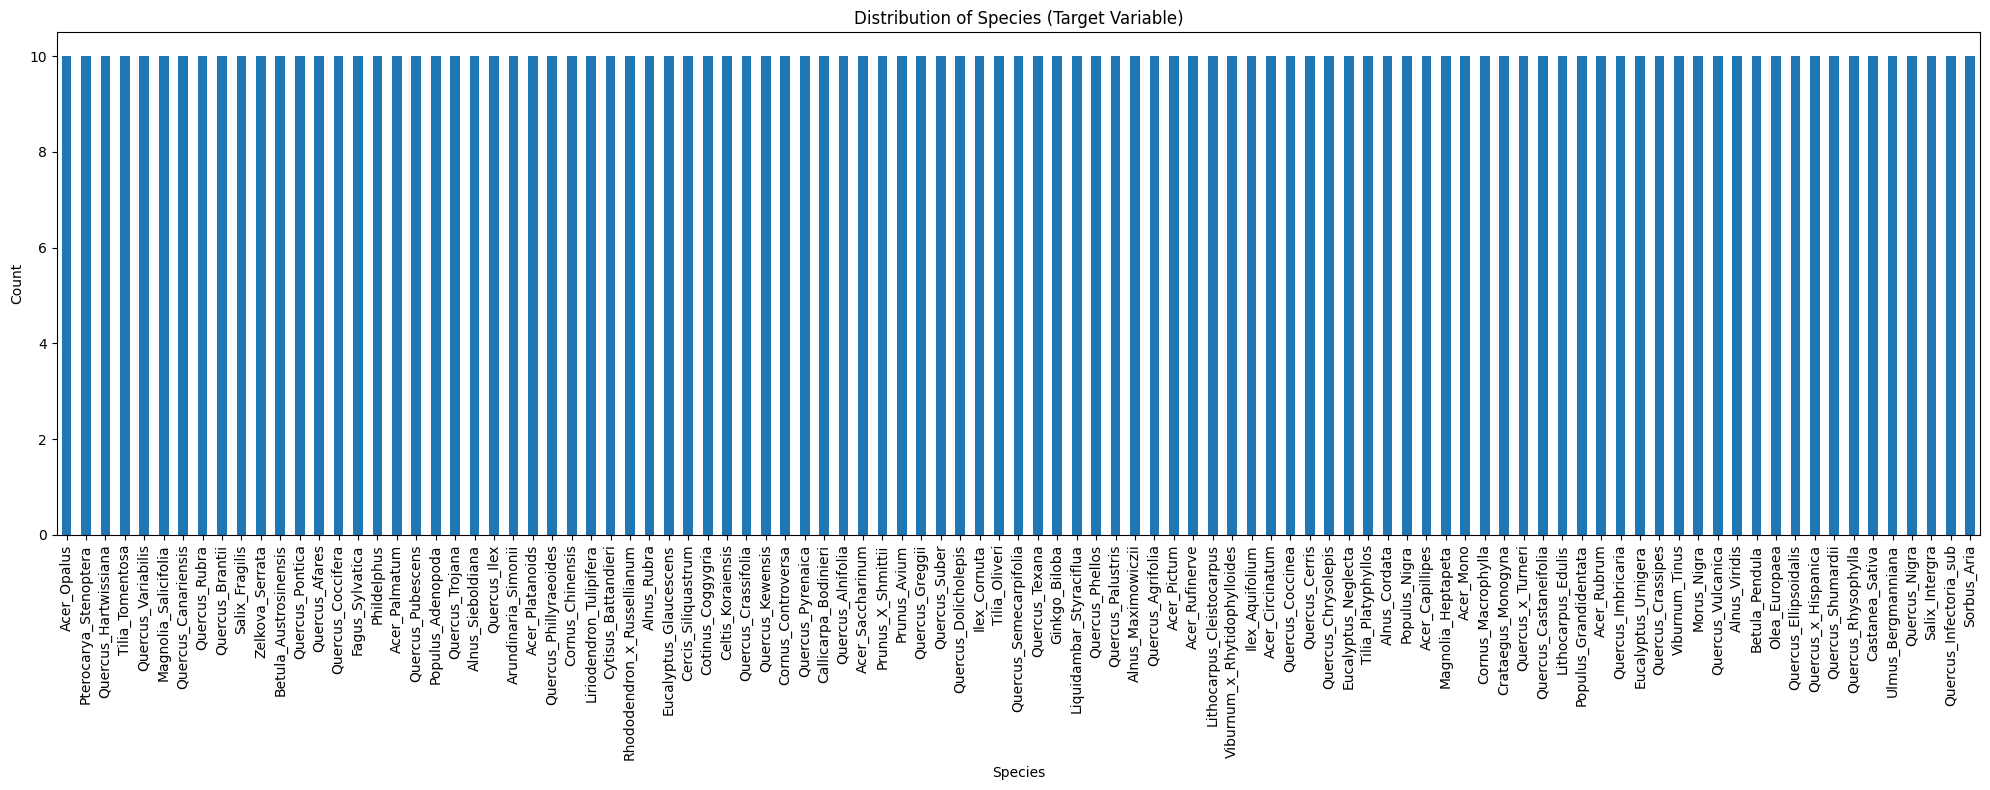

In [10]:
species_counts = train_data['species'].value_counts()

plt.figure(figsize=(20, 8))
species_counts.plot(kind='bar')
plt.title('Distribution of Species (Target Variable)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

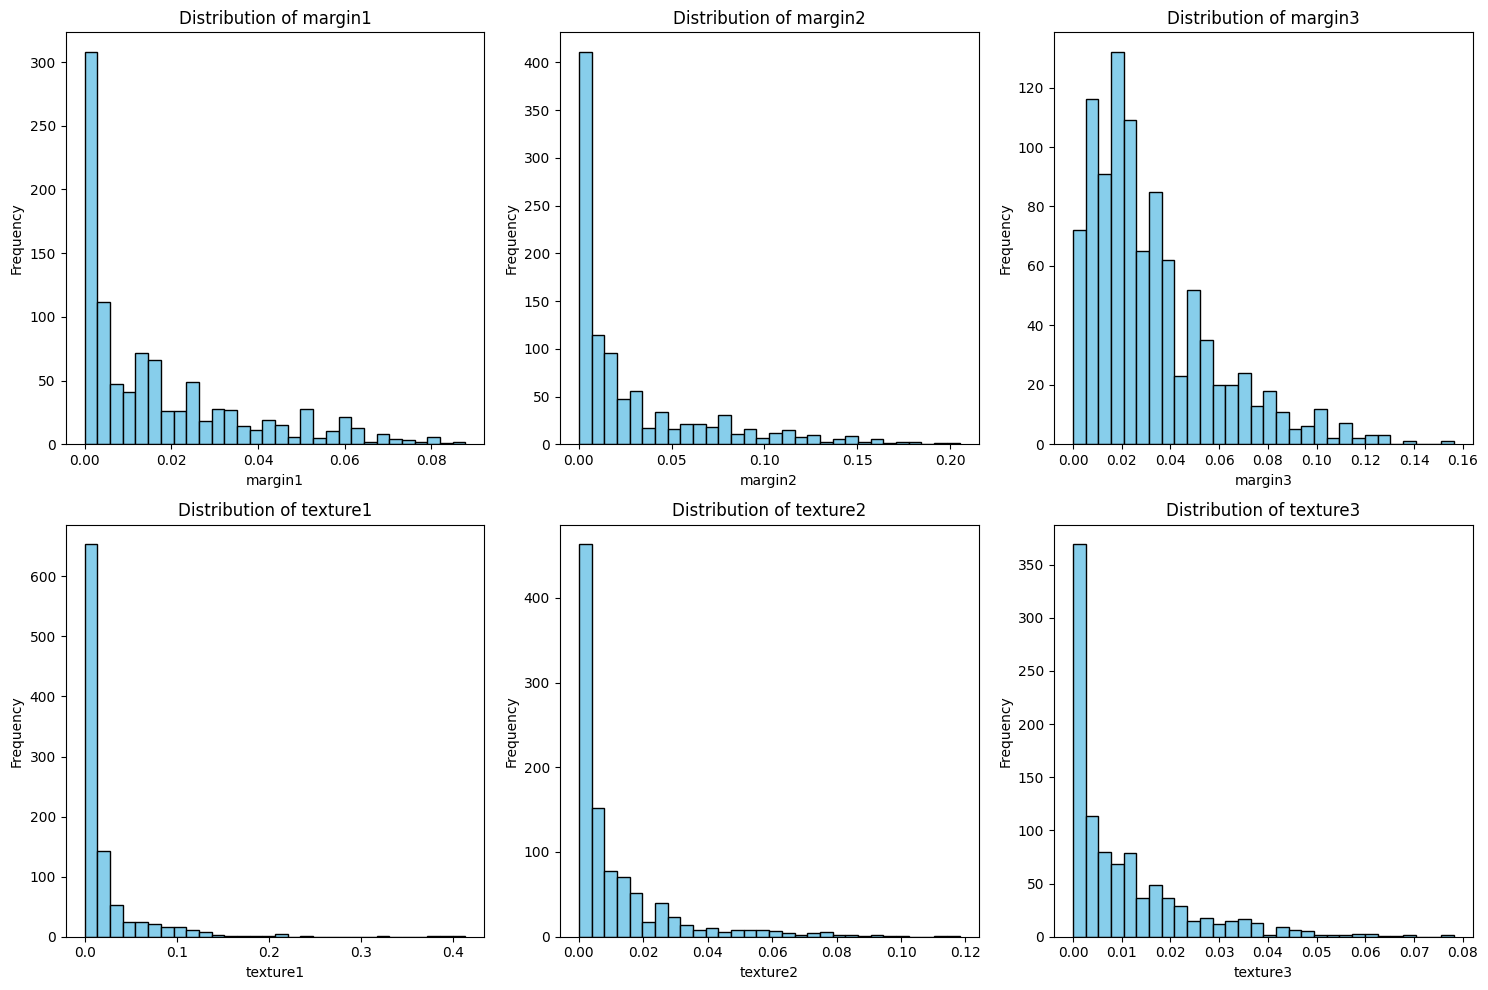

In [11]:
selected_features = ['margin1', 'margin2', 'margin3', 'texture1', 'texture2', 'texture3']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    plt.hist(train_data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [12]:
import seaborn as sns
print("Seaborn library imported successfully.")

Seaborn library imported successfully.


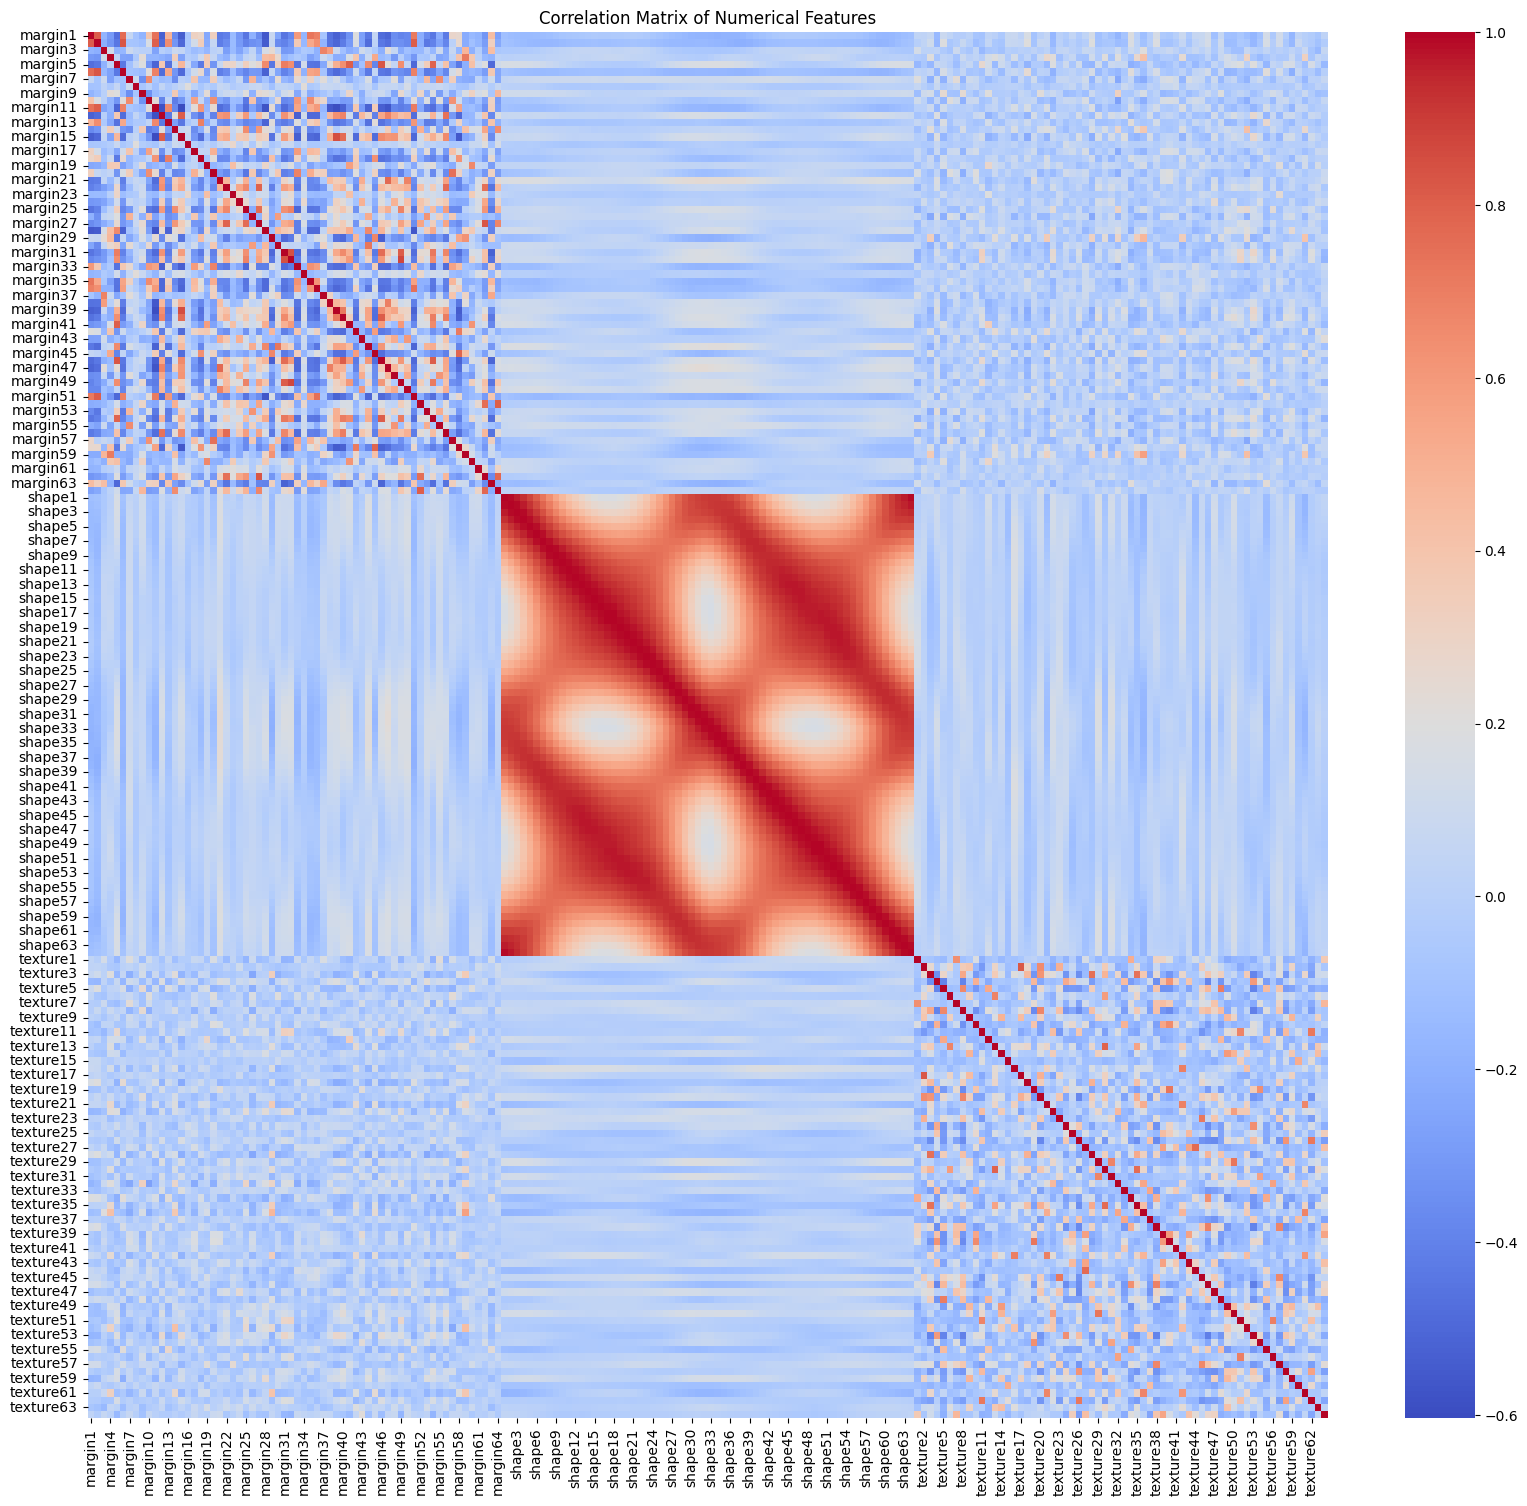

In [13]:
numerical_features = train_data.drop(columns=['id', 'species'], errors='ignore')

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [14]:
numerical_features_no_id_species = train_data.drop(columns=['id', 'species'], errors='ignore')

variances = numerical_features_no_id_species.var()

threshold = 1e-5

near_zero_variance_features = variances[variances < threshold].index.tolist()

if len(near_zero_variance_features) > 0:
    print(f"Detected {len(near_zero_variance_features)} features with near-zero variance (threshold={threshold}):")
    for feature in near_zero_variance_features:
        print(f"- {feature}")
    print("\nThese features might be candidates for removal as they may not contribute significantly to the model.")
else:
    print(f"No features with near-zero variance detected (below threshold of {threshold}).")

Detected 68 features with near-zero variance (threshold=1e-05):
- margin8
- margin16
- margin34
- margin61
- shape1
- shape2
- shape3
- shape4
- shape5
- shape6
- shape7
- shape8
- shape9
- shape10
- shape11
- shape12
- shape13
- shape14
- shape15
- shape16
- shape17
- shape18
- shape19
- shape20
- shape21
- shape22
- shape23
- shape24
- shape25
- shape26
- shape27
- shape28
- shape29
- shape30
- shape31
- shape32
- shape33
- shape34
- shape35
- shape36
- shape37
- shape38
- shape39
- shape40
- shape41
- shape42
- shape43
- shape44
- shape45
- shape46
- shape47
- shape48
- shape49
- shape50
- shape51
- shape52
- shape53
- shape54
- shape55
- shape56
- shape57
- shape58
- shape59
- shape60
- shape61
- shape62
- shape63
- shape64

These features might be candidates for removal as they may not contribute significantly to the model.


In [15]:
numerical_features_for_scaling = train_data.drop(columns=['id', 'species'], errors='ignore')

skewness = numerical_features_for_scaling.skew()

print("Skewness of numerical features (top 10 most skewed):\n", skewness.sort_values(ascending=False).head(10))
print("\nSkewness of numerical features (top 10 least skewed):\n", skewness.sort_values(ascending=True).head(10))

Skewness of numerical features (top 10 most skewed):
 margin16     10.905631
texture15     7.987887
texture60     6.266084
texture56     6.081514
texture61     6.077150
margin52      5.600765
margin23      5.429523
texture36     5.036056
margin64      4.776028
texture37     4.749952
dtype: float64

Skewness of numerical features (top 10 least skewed):
 shape31    0.330806
shape32    0.331883
shape34    0.339360
shape35    0.342993
shape33    0.343383
shape30    0.354891
shape36    0.358352
shape61    0.425979
shape62    0.450521
shape29    0.472032
dtype: float64


In [16]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

features_to_scale = train_data.drop(columns=['id', 'species'], errors='ignore')

train_scaled_features = robust_scaler.fit_transform(features_to_scale)

train_scaled_df = pd.DataFrame(train_scaled_features, columns=features_to_scale.columns)

if 'test_data' in globals():
    test_features_to_scale = test_data.drop(columns=['id'], errors='ignore')
    test_scaled_features = robust_scaler.transform(test_features_to_scale)
    test_scaled_df = pd.DataFrame(test_scaled_features, columns=test_features_to_scale.columns)
    print("Test data also scaled.")

print("First 5 rows of scaled training features:")
display(train_scaled_df.head())
print("\nDescriptive statistics of scaled training features:")
display(train_scaled_df.describe())

Test data also scaled.
First 5 rows of scaled training features:


,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,-0.083369,0.300003,-0.062496,-0.416674,0.250048,-0.104340,0.500000,0.0,-0.666667,0.818152,...,0.067024,0.000000,-0.137902,0.199980,1.352991,0.0,0.0,0.041684,-0.23080,0.482768
1,-0.166695,-0.300003,0.187488,0.083326,1.125056,-0.243479,0.166652,0.0,-1.000000,-0.363649,...,-0.089380,0.000000,-0.275851,0.000000,0.647130,0.0,0.0,-0.124968,2.84616,0.379308
2,-0.166695,-0.049996,-0.187520,-0.250021,-0.249984,-0.173918,2.249936,0.0,-1.000000,1.363603,...,3.419075,0.000000,0.000000,0.000000,-0.294139,0.0,0.0,-0.166652,1.38464,-0.310346
3,-0.416674,-0.200010,-0.062496,-0.333348,0.875008,0.069560,0.333348,0.0,1.333504,0.090901,...,-0.111737,0.000977,-0.275851,-0.100041,0.470634,0.0,0.0,0.583326,-0.23080,1.275883
4,-0.166695,-0.200010,0.749984,-0.166652,0.375040,0.000000,-0.416674,0.0,-1.000000,-0.454550,...,2.100570,0.000000,0.735649,-0.100041,-0.764713,0.0,0.0,-0.166652,-0.23080,0.689654



Descriptive statistics of scaled training features:


,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.326238,0.430594,0.211099,0.409916,0.412907,0.408782,0.152604,0.001083,0.223286,0.140307,...,0.723504,0.005024,0.474801,1.086280,0.205612,0.014017,0.002688,0.699073,0.477299,0.271922
std,0.842180,0.994673,0.827099,1.212188,1.176944,0.926571,0.747114,0.002743,1.524611,0.748027,...,1.450844,0.019321,1.092963,2.563981,0.923723,0.060151,0.011415,1.665659,1.086351,0.803944
min,-0.416674,-0.300003,-0.812512,-0.583326,-0.499968,-0.278259,-0.666652,0.000000,-1.000000,-0.727252,...,-0.111737,0.000000,-0.275851,-0.100041,-0.764713,0.000000,0.000000,-0.166652,-0.230800,-0.413806
25%,-0.333348,-0.250006,-0.375008,-0.333348,-0.374976,-0.278259,-0.416674,0.000000,-0.666667,-0.454550,...,-0.111737,0.000000,-0.229852,-0.100041,-0.470574,0.000000,0.000000,-0.166652,-0.230800,-0.379308
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666652,0.749994,0.624992,0.666652,0.625024,0.721741,0.583326,0.000000,0.333333,0.545450,...,0.888263,0.000000,0.770148,0.899959,0.529426,0.000000,0.000000,0.833348,0.769200,0.620692
max,3.333262,4.949978,4.187488,6.666439,6.625152,5.252192,3.249936,0.031250,12.000853,3.818059,...,9.720762,0.202150,7.862192,20.399652,5.647551,0.578130,0.151370,15.874819,6.615518,4.586194


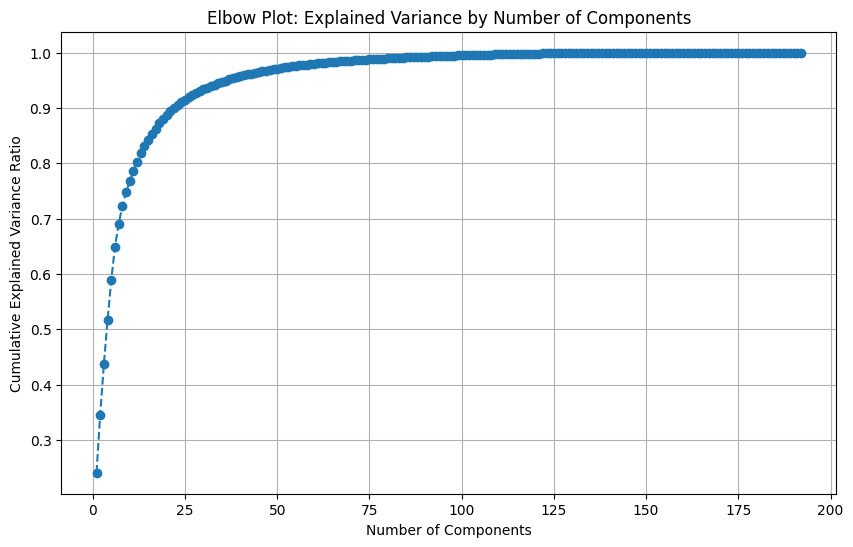

Explained variance ratio for the first 5 components:
[0.24075275 0.10456472 0.0922088  0.07904996 0.07222564]
Cumulative explained variance for the first 5 components:
[0.24075275 0.34531747 0.43752627 0.51657623 0.58880187]


In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_scaled = train_scaled_df

pca = PCA()
pca.fit(X_scaled)

cum_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.title('Elbow Plot: Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

print("Explained variance ratio for the first 5 components:")
print(pca.explained_variance_ratio_[:5])
print("Cumulative explained variance for the first 5 components:")
print(cum_explained_variance[:5])

**Reasoning**:
To encode the 'species' column, I will initialize a `LabelEncoder`, fit it on the 'species' column from `train_data`, transform the column into numerical labels, and store the mapping for future use.



In [31]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['species'])

species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("First 10 encoded species labels:")
print(y_encoded[:10])
print("\nUnique encoded species labels:")
print(pd.Series(y_encoded).unique())
print("\nSpecies mapping (first 10 entries):")
print({k: species_mapping[k] for i, k in enumerate(species_mapping) if i < 10})

First 10 encoded species labels:
[ 3 49 65 94 84 40 54 78 53 89]

Unique encoded species labels:
[ 3 49 65 94 84 40 54 78 53 89 98 16 74 50 58 31 43  4 75 44 83 13 66 15
  6 73 22 36 27 88 12 28 21 25 20 60 69 23 76 18 52  9 48 47 64 81 62 34
 92 79 82 32 35 72 71 11 51  5  8 37 97 33  1 59 56 57 29 93 10 46  0 39
  2 24 26 87 55 38 45  7 67 30 61 96 41 85 14 17 42 63 86 80 77 19 95 70
 90 68 91]

Species mapping (first 10 entries):
{'Acer_Capillipes': np.int64(0), 'Acer_Circinatum': np.int64(1), 'Acer_Mono': np.int64(2), 'Acer_Opalus': np.int64(3), 'Acer_Palmatum': np.int64(4), 'Acer_Pictum': np.int64(5), 'Acer_Platanoids': np.int64(6), 'Acer_Rubrum': np.int64(7), 'Acer_Rufinerve': np.int64(8), 'Acer_Saccharinum': np.int64(9)}


**Reasoning**:
To perform feature selection using ANOVA F-value, I will first import `SelectKBest` and `f_classif`, then prepare the scaled feature data, apply `SelectKBest` to identify the top features, and finally display the results.



In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

X = train_scaled_df
y = y_encoded

k_features = 50
selector = SelectKBest(f_classif, k=k_features)

selector.fit(X, y)

selected_features_indices = selector.get_support(indices=True)

selected_features_anova = X.columns[selected_features_indices]

selected_features_scores = selector.scores_[selected_features_indices]

anova_feature_scores = pd.DataFrame({
    'Feature': selected_features_anova,
    'ANOVA_F_Score': selected_features_scores
})

anova_feature_scores = anova_feature_scores.sort_values(by='ANOVA_F_Score', ascending=False)

print(f"Top {k_features} features selected by SelectKBest (ANOVA F-value):")
print(anova_feature_scores)

Top 50 features selected by SelectKBest (ANOVA F-value):
     Feature  ANOVA_F_Score
20   shape16     116.292408
21   shape17     114.529356
22   shape18     109.483234
19   shape15     109.354733
36   shape49     105.280069
37   shape50     103.743193
35   shape48     102.068326
23   shape19     101.875840
38   shape51      98.651323
34   shape47      98.089752
18   shape14      95.471693
24   shape20      91.187559
39   shape52      88.153277
33   shape46      87.294057
25   shape21      82.052168
40   shape53      78.693851
17   shape13      78.491539
7   margin32      75.772282
26   shape22      75.702638
1    margin2      74.000484
41   shape54      73.437754
32   shape45      72.651229
2    margin5      72.166551
14  margin62      68.984893
27   shape23      67.795902
42   shape55      67.240388
16   shape12      65.815650
13  margin59      65.748069
8   margin41      64.688802
31   shape44      63.858406
10  margin48      63.789311
43   shape56      63.461431
3   margin13      6

Optimal number of features: 132
Selected features by RFECV:
['margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6', 'margin7', 'margin9', 'margin11', 'margin13', 'margin14', 'margin15', 'margin18', 'margin19', 'margin20', 'margin21', 'margin24', 'margin27', 'margin30', 'margin31', 'margin32', 'margin38', 'margin39', 'margin41', 'margin43', 'margin44', 'margin45', 'margin46', 'margin47', 'margin48', 'margin49', 'margin50', 'margin51', 'margin53', 'margin54', 'margin55', 'margin58', 'margin59', 'margin62', 'margin63', 'shape1', 'shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape8', 'shape9', 'shape10', 'shape11', 'shape12', 'shape13', 'shape14', 'shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape20', 'shape21', 'shape22', 'shape27', 'shape28', 'shape29', 'shape30', 'shape31', 'shape32', 'shape33', 'shape34', 'shape35', 'shape36', 'shape37', 'shape38', 'shape44', 'shape45', 'shape46', 'shape47', 'shape48', 'shape49', 'shape50', 'shape51', 'shape56', 'shape57', 's

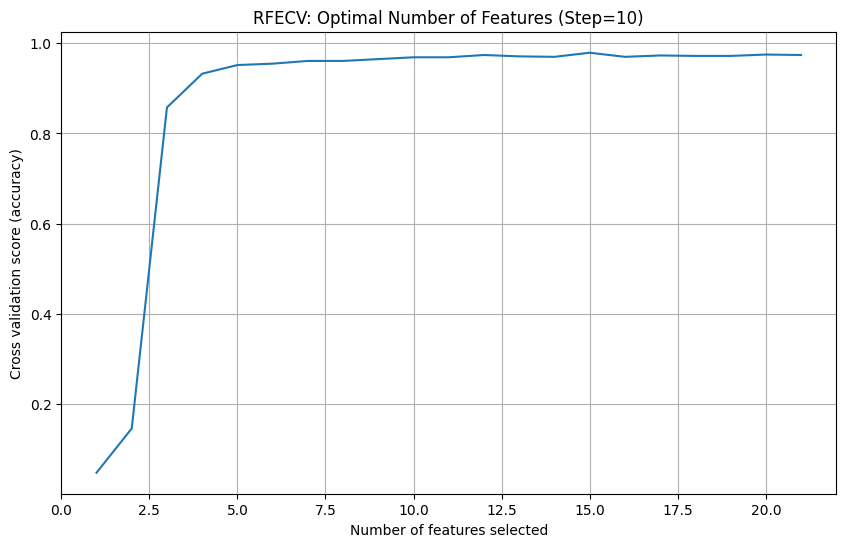

In [20]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=75, random_state=42)

STEP_SIZE = 10

rfecv_optimized = RFECV(
    estimator=estimator,
    step=STEP_SIZE,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rfecv_optimized.fit(X, y)

print(f"Optimal number of features: {rfecv_optimized.n_features_}")


selected_features_rfe = X.columns[rfecv_optimized.support_]
print("Selected features by RFECV:")
print(selected_features_rfe.tolist())

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv_optimized.cv_results_['mean_test_score']) + 1),
         rfecv_optimized.cv_results_['mean_test_score'])
plt.title(f"RFECV: Optimal Number of Features (Step={STEP_SIZE})")
plt.grid(True)
plt.show()

**Reasoning**:
To extract and visualize feature importance, I will first train a RandomForestClassifier, then retrieve feature importances, organize them into a DataFrame, sort, select the top 20, and finally create a bar chart for visualization.



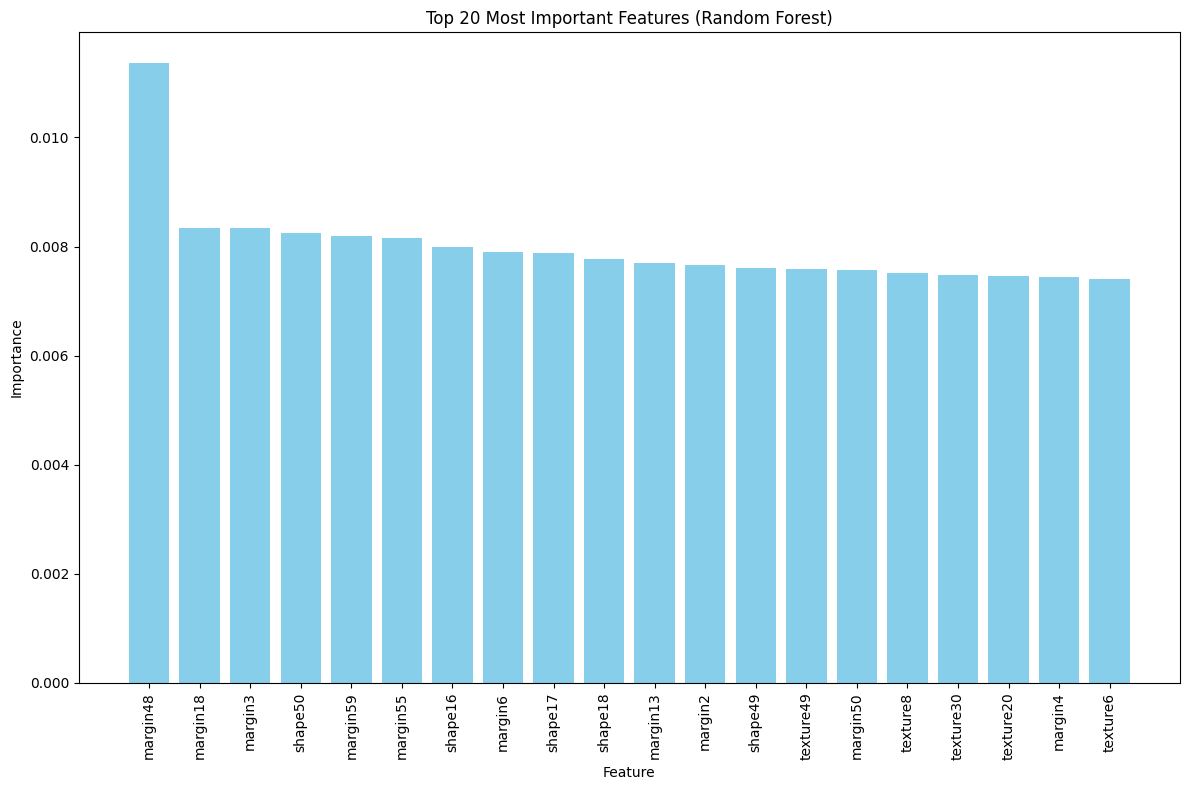

In [33]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(train_scaled_df, y_encoded)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_scaled_df.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_20_features = importance_df.head(20)

plt.figure(figsize=(12, 8))
plt.bar(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X = train_scaled_df
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (792, 192)
Shape of X_test: (198, 192)
Shape of y_train: (792,)
Shape of y_test: (198,)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, balanced_accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("RandomForestClassifier trained and predictions made on the test set.")

RandomForestClassifier trained and predictions made on the test set.


Accuracy: 0.9848
Balanced Accuracy: 0.9848

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16  

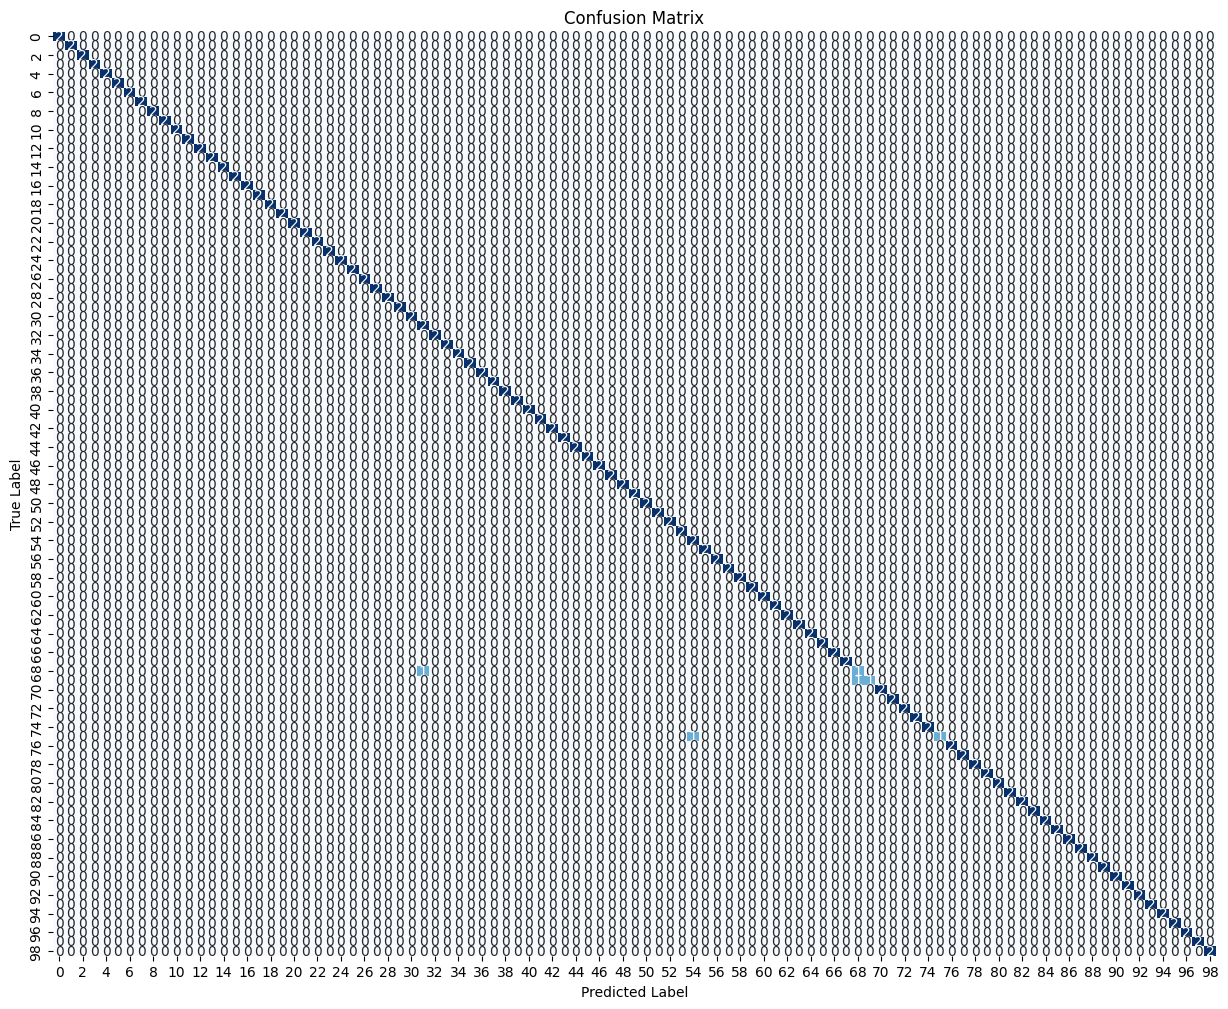

In [36]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
from sklearn.model_selection import StratifiedKFold

n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"StratifiedKFold initialized with {n_splits} splits.")
print("It is ready to be used in hyperparameter tuning (e.g., with GridSearchCV or RandomizedSearchCV).")


StratifiedKFold initialized with 5 splits.
It is ready to be used in hyperparameter tuning (e.g., with GridSearchCV or RandomizedSearchCV).


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, n_jobs=-1)

log_reg_model.fit(X_train, y_train)

print("Multinomial Logistic Regression model trained.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multinomial Logistic Regression model trained.


Logistic Regression - Accuracy: 0.9747
Logistic Regression - Balanced Accuracy: 0.9747

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
  

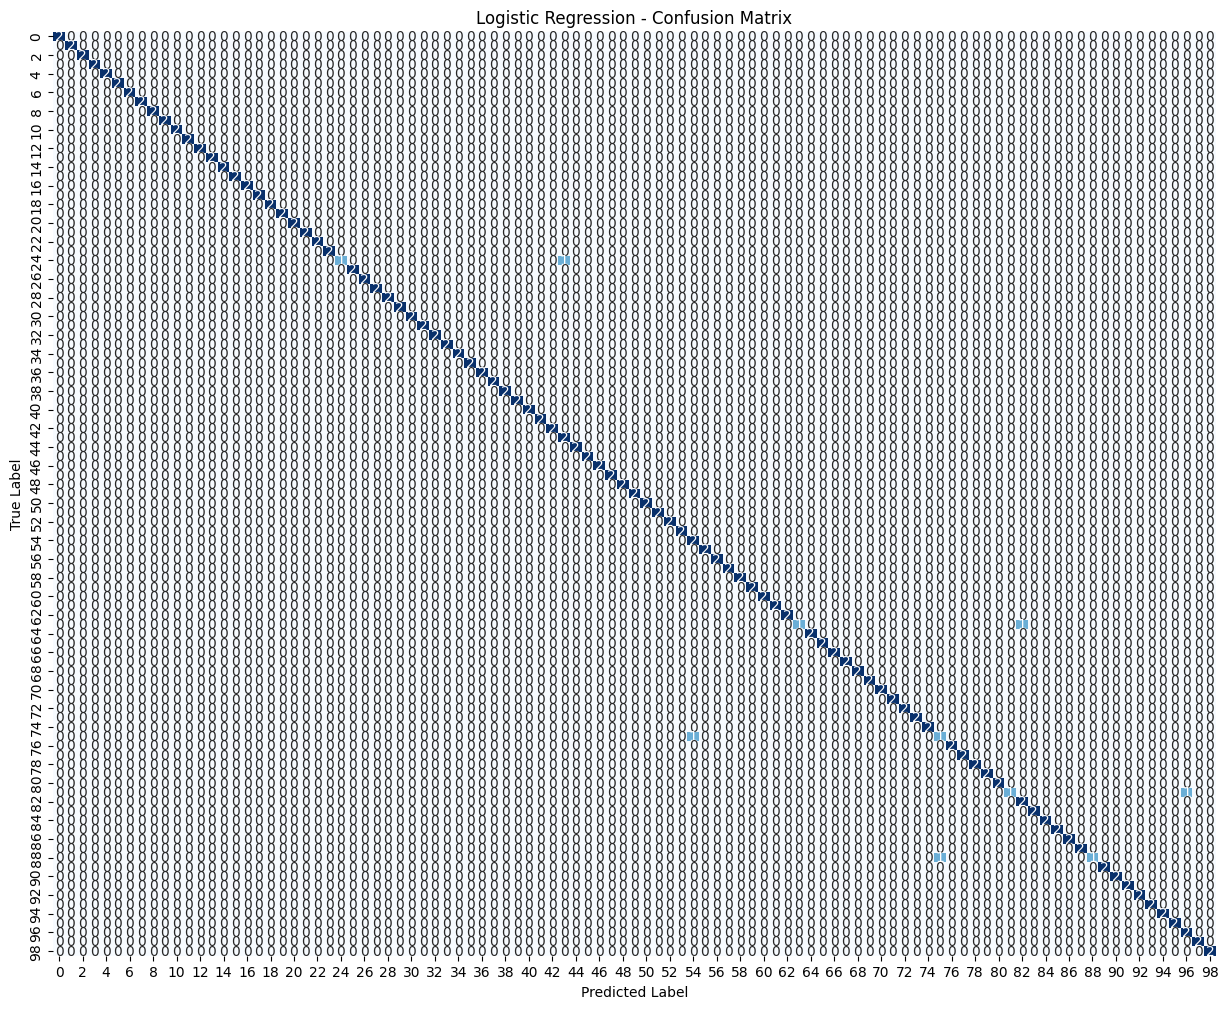

In [39]:

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.4f}")


balanced_acc_log_reg = balanced_accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression - Balanced Accuracy: {balanced_acc_log_reg:.4f}")


print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(15, 12))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Reasoning**:
To perform hyperparameter tuning for the `RandomForestClassifier`, I will first import `RandomizedSearchCV`, define the hyperparameter distribution, initialize `RandomizedSearchCV` with the `skf` cross-validator, fit it to the training data, and then evaluate the best model on the test set.



In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500, 700, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_estimator = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf_estimator,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=skf,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)


print("Starting RandomizedSearchCV fitting...")
random_search.fit(X_train, y_train)
print("RandomizedSearchCV fitting complete.")

print("\nBest parameters found:")
print(random_search.best_params_)

print("\nBest cross-validation f1_macro score:")
print(random_search.best_score_)

best_rf_model = random_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_macro_best_rf = f1_score(y_test, y_pred_best_rf, average='macro')

print(f"\nBest RandomForestClassifier on Test Set - Accuracy: {accuracy_best_rf:.4f}")
print(f"Best RandomForestClassifier on Test Set - F1-macro: {f1_macro_best_rf:.4f}")

best_random_forest_model = best_rf_model
best_random_forest_accuracy = accuracy_best_rf
best_random_forest_f1_macro = f1_macro_best_rf

print("Best model and performance metrics stored.")

Starting RandomizedSearchCV fitting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV fitting complete.

Best parameters found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

Best cross-validation f1_macro score:
0.9752861952861952

Best RandomForestClassifier on Test Set - Accuracy: 0.9747
Best RandomForestClassifier on Test Set - F1-macro: 0.9734
Best model and performance metrics stored.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, None],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'lambda': [0.1, 1, 10],
    'alpha': [0.1, 1, 10]
}

xgb_estimator = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)


random_search_xgb = RandomizedSearchCV(
    estimator=xgb_estimator,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=skf,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting RandomizedSearchCV fitting for XGBoost...")
random_search_xgb.fit(X_train, y_train)
print("RandomizedSearchCV fitting for XGBoost complete.")

print("\nBest parameters found for XGBoost:")
print(random_search_xgb.best_params_)

print("\nBest cross-validation f1_macro score for XGBoost:")
print(random_search_xgb.best_score_)

best_xgb_model = random_search_xgb.best_estimator_

y_pred_best_xgb = best_xgb_model.predict(X_test)

accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
f1_macro_best_xgb = f1_score(y_test, y_pred_best_xgb, average='macro')

print(f"\nBest XGBoost Classifier on Test Set - Accuracy: {accuracy_best_xgb:.4f}")
print(f"Best XGBoost Classifier on Test Set - F1-macro: {f1_macro_best_xgb:.4f}")

best_xgboost_model = best_xgb_model
best_xgboost_accuracy = accuracy_best_xgb
best_xgboost_f1_macro = f1_macro_best_xgb

print("Best XGBoost model and performance metrics stored.")

Starting RandomizedSearchCV fitting for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


**Reasoning**:
The previous steps successfully tuned and evaluated both RandomForestClassifier and XGBoost Classifier models. Now, to complete the analysis, I will compare their performance metrics (Accuracy and F1-macro score) on the test set, which were stored in variables, and present them clearly for a concise overview.



In [ ]:
print("\n--- Model Performance Comparison on Test Set ---")
print(f"RandomForestClassifier - Accuracy: {best_random_forest_accuracy:.4f}")
print(f"RandomForestClassifier - F1-macro: {best_random_forest_f1_macro:.4f}")
print(f"\nXGBoost Classifier - Accuracy: {best_xgboost_accuracy:.4f}")
print(f"XGBoost Classifier - F1-macro: {best_xgboost_f1_macro:.4f}")

if best_random_forest_accuracy > best_xgboost_accuracy:
    print("\nRandomForestClassifier has better Accuracy on the test set.")
elif best_xgboost_accuracy > best_random_forest_accuracy:
    print("\nXGBoost Classifier has better Accuracy on the test set.")
else:
    print("\nBoth models have similar Accuracy on the test set.")

if best_random_forest_f1_macro > best_xgboost_f1_macro:
    print("RandomForestClassifier has better F1-macro score on the test set.")
elif best_xgboost_f1_macro > best_random_forest_f1_macro:
    print("XGBoost Classifier has better F1-macro score on the test set.")
else:
    print("Both models have similar F1-macro scores on the test set.")

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_dist_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svc_estimator = SVC(random_state=42, probability=True)

random_search_svc = RandomizedSearchCV(
    estimator=svc_estimator,
    param_distributions=param_dist_svc,
    n_iter=20,
    cv=skf,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)


print("Starting RandomizedSearchCV fitting for SVC...")
random_search_svc.fit(X_train, y_train)
print("RandomizedSearchCV fitting for SVC complete.")

print("\nBest parameters found for SVC:")
print(random_search_svc.best_params_)


print("\nBest cross-validation f1_macro score for SVC:")
print(random_search_svc.best_score_)


best_svc_model = random_search_svc.best_estimator_

y_pred_best_svc = best_svc_model.predict(X_test)


accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
f1_macro_best_svc = f1_score(y_test, y_pred_best_svc, average='macro')

print(f"\nBest SVC Classifier on Test Set - Accuracy: {accuracy_best_svc:.4f}")
print(f"Best SVC Classifier on Test Set - F1-macro: {f1_macro_best_svc:.4f}")


best_svm_model = best_svc_model
best_svm_accuracy = accuracy_best_svc
best_svm_f1_macro = f1_macro_best_svc

print("Best SVC model and performance metrics stored.")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_estimator = MLPClassifier(random_state=42, max_iter=1000)

random_search_mlp = RandomizedSearchCV(
    estimator=mlp_estimator,
    param_distributions=param_dist_mlp,
    n_iter=30,
    cv=skf,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting RandomizedSearchCV fitting for MLPClassifier...")
random_search_mlp.fit(X_train, y_train)
print("RandomizedSearchCV fitting for MLPClassifier complete.")

print("\nBest parameters found for MLPClassifier:")
print(random_search_mlp.best_params_)

print("\nBest cross-validation f1_macro score for MLPClassifier:")
print(random_search_mlp.best_score_)

best_mlp_model = random_search_mlp.best_estimator_

y_pred_best_mlp = best_mlp_model.predict(X_test)

accuracy_best_mlp = accuracy_score(y_test, y_pred_best_mlp)
f1_macro_best_mlp = f1_score(y_test, y_pred_best_mlp, average='macro')

print(f"\nBest MLPClassifier on Test Set - Accuracy: {accuracy_best_mlp:.4f}")
print(f"Best MLPClassifier on Test Set - F1-macro: {f1_macro_best_mlp:.4f}")

best_mlp_model_stored = best_mlp_model
best_mlp_accuracy = accuracy_best_mlp
best_mlp_f1_macro = f1_macro_best_mlp

print("Best MLPClassifier model and performance metrics stored.")

In [ ]:
import pandas as pd

performance_data = {
    'Model': ['RandomForestClassifier', 'XGBoost Classifier', 'Support Vector Machine', 'MLPClassifier'],
    'Accuracy': [best_random_forest_accuracy, best_xgboost_accuracy, best_svm_accuracy, best_mlp_accuracy],
    'F1-macro': [best_random_forest_f1_macro, best_xgboost_f1_macro, best_svm_f1_macro, best_mlp_f1_macro]
}


performance_df = pd.DataFrame(performance_data)

print("Model Performance Comparison:")
print(performance_df)

best_accuracy_model = performance_df.loc[performance_df['Accuracy'].idxmax()]
print(f"\nBest model by Accuracy: {best_accuracy_model['Model']} (Accuracy: {best_accuracy_model['Accuracy']:.4f})")

best_f1_model = performance_df.loc[performance_df['F1-macro'].idxmax()]
print(f"Best model by F1-macro: {best_f1_model['Model']} (F1-macro: {best_f1_model['F1-macro']:.4f})")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder

train_data = pd.read_csv('/content/sample_data/train.csv.zip')

robust_scaler = RobustScaler()
features_to_scale = train_data.drop(columns=['id', 'species'], errors='ignore')
train_scaled_features = robust_scaler.fit_transform(features_to_scale)
train_scaled_df = pd.DataFrame(train_scaled_features, columns=features_to_scale.columns)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['species'])

X_scaled = train_scaled_df
y = y_encoded

pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)


pca_df = pd.DataFrame(data=X_pca_2d, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = y


plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Species',
    data=pca_df,
    palette='tab20',
    legend='full',
    alpha=0.7
)
plt.title('2D PCA Representation of Leaf Species (Colored by Class)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print(f"Explained variance by PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"Explained variance by PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"Total explained variance by 2 PCs: {pca_2d.explained_variance_ratio_.sum():.4f}")